In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
C1A, C2A, C3A = 11, 12, 9
C1B, C2B, C3B = 3, 7, 4
Zc1, Zc2, Zc3 = 700, 400, 180
PA, PB = 20, 15

In [39]:
constraints = [
    (C1A, C1B, Zc1),
    (C2A, C2B, Zc2),
    (C3A, C3B, Zc3),
]

In [40]:
def constraint_func(a, b, c):
    """Возвращает функцию ограничения x2 = (c - a*x1) / b"""
    return lambda x1: (c - a * x1) / b if b != 0 else np.full_like(x1, np.inf)

def is_feasible(x, y, eps=1e-9):
    """Проверяет, удовлетворяет ли точка (x, y) всем ограничениям и неотрицательности"""
    if x < -eps or y < -eps:
        return False
    return all(a * x + b * y <= c + eps for a, b, c in constraints)

In [41]:
max_x1 = max(c / a if a > 0 else 0 for a, _, c in constraints)
max_x2 = max(c / b if b > 0 else 0 for _, b, c in constraints)

points = []

for a, b, c in constraints:
    if b > 0:
        points.append((0.0, c / b))
    if a > 0:
        points.append((c / a, 0.0))

for i in range(len(constraints)):
    for j in range(i + 1, len(constraints)):
        a1, b1, c1 = constraints[i]
        a2, b2, c2 = constraints[j]
        det = a1 * b2 - a2 * b1
        if abs(det) > 1e-9:
            x = (c1 * b2 - c2 * b1) / det
            y = (a1 * c2 - a2 * c1) / det
            points.append((x, y))

In [42]:
feasible_points = [p for p in points if is_feasible(*p)]
unique_points = []
for p in feasible_points:
    if not any(np.allclose(p, q, atol=1e-6) for q in unique_points):
        unique_points.append(p)

if not any(np.allclose(p, (0, 0), atol=1e-6) for p in unique_points):
    unique_points.append((0, 0))

if len(unique_points) >= 3:
    centroid = np.mean(unique_points, axis=0)
    unique_points.sort(key=lambda p: np.arctan2(p[1] - centroid[1], p[0] - centroid[0]))

In [43]:
L_values = [(PA * x + PB * y, x, y) for x, y in unique_points]
L_max = max(val for val, _, _ in L_values)
best_points = [(x, y) for val, x, y in L_values if abs(val - L_max) < 1e-6]

Text(386.84722222222223, 0.5, '$x_2$')

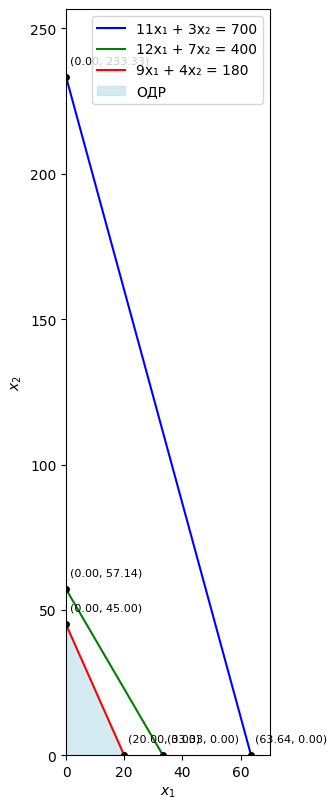

In [53]:
plt.figure(figsize=(10, 8))

x1_vals = np.linspace(0, max_x1 * 1.1, 200)
for (a, b, c), color, label in zip(constraints, ['blue', 'green', 'red'],
                                   [f'{a}x₁ + {b}x₂ = {c}' for a, b, c in constraints]):
    if b != 0:
        plt.plot(x1_vals, (c - a * x1_vals) / b, color=color, label=label)

for x, y in points:
    if x >= -1e-6 and y >= -1e-6:
        plt.plot(x, y, 'ko', markersize=4)
        plt.text(x + max_x1 * 0.02, y + max_x2 * 0.02,
                 f'({x:.2f}, {y:.2f})', fontsize=8)

if len(unique_points) >= 3:
    odr_x, odr_y = zip(*unique_points)
    plt.fill(odr_x, odr_y, color='lightblue', alpha=0.5, label='ОДР')

plt.xlim(0, max_x1 * 1.1)
plt.ylim(0, max_x2 * 1.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper right')
plt.tight_layout()
plt.legend()

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

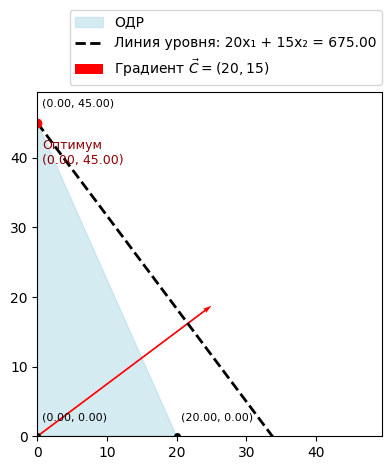

In [55]:
if len(unique_points) >= 3:
    odr_x, odr_y = zip(*unique_points)
    plt.fill(odr_x, odr_y, color='lightblue', alpha=0.5, label='ОДР')
    plt.plot(odr_x, odr_y, 'ko', markersize=4)
    for x, y in zip(odr_x, odr_y):
        plt.text(x + max_x1 * 0.01, y + max_x2 * 0.01,
                    f'({x:.2f}, {y:.2f})', fontsize=8)

    max_val = max(max(odr_x), max(odr_y)) * 1.1
    plt.xlim(0, max_val)
    plt.ylim(0, max_val)

x_level = np.linspace(0, max_x1 * 1.1, 100)
y_level = (L_max - PA * x_level) / PB
plt.plot(x_level, y_level, 'k--', linewidth=2,
         label=f'Линия уровня: {PA}x₁ + {PB}x₂ = {L_max:.2f}')
plt.gca().set_aspect('equal', adjustable='box')

for x, y in best_points:
    plt.plot(x, y, 'ro', markersize=6)
    plt.text(x + max_x1 * 0.01, y - max_x2 * 0.025,
             f'Оптимум\n({x:.2f}, {y:.2f})', fontsize=9, color='darkred')

scale = 1.25
plt.quiver(0, 0, PA * scale, PB * scale,
           angles='xy', scale_units='xy', scale=1,
           color='red', width=0.005, label=r'Градиент $\vec{C} = (20, 15)$')

plt.legend(bbox_to_anchor=(1.02, 1), loc='lower right')
plt.tight_layout()